# TASEPy tutorial

In this notebook we run a short tutorial explaining how to compute particle densities and current using TASEPy. 

We consider a small system with the following parameters:
-  the lattice size $L = 4$,
-  the hopping rates for each lattice site $\omega = [1.88,1.52, 1.09,1.38]$,
-  the particle size $\ell = 1$ and
-  the maximum order of the power-series approximation (PSA) $K=5$.

## 1. Parameter declaration
We start by importing the necessary libraries and declaring the parameters explained above.

In [3]:
# import methods from TASEPy

from TASEPy import psa_compute
from TASEPy import local_density
from TASEPy import mean_density
from TASEPy import current

In [5]:
# declare parameters

# particle size (in lattice sites)
l = 1

# list of particle hopping rates
rate_list = [1.88, 1.52, 1.09, 1.38] 
 
# maximum order of the PSA
n_max = 5 

# lattice size is equal to the number of hopping rates 
L=len(rate_list)

## 2. Compute the PSA coefficients

The core of TASEPy resides in the function `psa_compute(wlist, K, ll)`. This function takes 3 inputs: `wlist` is the list of rates, `K` is the maximum order computed by the algorithm, and `ll` is the particle size. The lattice size $L$ is inferred from the size of `wlist`. The function computes all the coefficients $c_n(X)$ and returns 2 elements: (1) a 2d list containing the density coefficients $\rho_{i,n}$ for all sites $i$ and orders $n$, and (2) a list containing the values of the current coefficients $J_n$. The coefficients $c_n(X)$ for $n=0,\dots,K$ are computed using Eqs.(29)-(31) of the affiliated paper. The $\rho_{i,n}$ and $J_n$ are computed using Eqs.(25).

In the following example the density and current coefficients are stored in the lists `rhocoeff` and `Jcoeff` respectively, which are defined as follows:
- `rhocoeff[i]` is the list $[\rho_{i+1, 0},\ldots\rho_{i+1, n}, \ldots, \rho_{i+1, K}]$ of density coefficients of the i-th order of the PSA (note that `rhocoeff[i]` corresponds to the lattice site $i+1$) and 
- `Jcoeff[i]` is the particle current coefficient of the i-th order of the PSA.

In [16]:
rhocoeff, Jcoeff = psa_compute(wlist = rate_list, K = n_max, ll = l)

In [17]:
print('rhocoeff =', rhocoeff)

rhocoeff = [[0.0, 0.5319148936170213, 0.1498920307129359, 0.8464620311607027, -1.085377548111616, -4.669583456509007], [0.0, 0.6578947368421053, 0.5648963664978299, 0.1344112037907157, -3.2494097742099264, 1.1932746381488086], [0.0, 0.9174311926605504, 0.1760938373279306, -0.9021018845887508, -0.9367682290850631, 0.8181410661819557], [0.0, 0.7246376811594204, -0.38544557508479804, -0.10861741356009791, -0.6133782834497837, 0.7865054696460984]]


In [18]:
print('Density coefficients of lattice site 2 are:',rhocoeff[1])

Density coefficients of lattice site 2 are: [0.0, 0.6578947368421053, 0.5648963664978299, 0.1344112037907157, -3.2494097742099264, 1.1932746381488086]


In [19]:
print('Jcoeff = ', Jcoeff)

Jcoeff =  [1.0, -0.5319148936170213, -0.14989203071293566, -0.8464620311607027, 1.0853775481116161, 4.669583456509007]


# 3. Plot density profile for a given value of $\alpha$

Here we chose a value of the initiation rate $\alpha$ and use the coefficients in the list `rhocoeff` to compute density profiles for different orders of the PSA. We use the method `local_density(rhocoeff, alpha)` and write the output in `profile`. `profile` is a list, whose elements are density profiles computed for different orders. According to Eq. (25b) in the affiliated paper, 

\begin{equation}
    \rho_i=\sum_{n=0}^{\infty}\rho_{i,n}\alpha^n,\quad \rho_{i,0}=0,\quad \rho_{i,n}=\sum_{\substack{C\\\tau_i=1}}c_n(C),\quad n\geq 1. \tag{25b}
\end{equation}

If we define $\rho_{i}^{(k)}=\sum_{n=0}^{k}\rho_{i,n}\alpha^n$, then `profile` is the list $[[\rho_{1}^{(0)},\ldots,\rho_{L}^{(0)}],\ldots,[\rho_{1}^{(K)},\ldots,\rho_{L}^{(K)}]]$, where $K$ is the maximum order of the PSA. For instance, `profile[2]` contains the density profile computed up to and including the order $n=2$. Note that `profile[0]` should always return $[0,...,0]$.

In [20]:
alpha = 0.2
profile = local_density(rhocoeff, alpha)

The cell below plots density profiles for all orders up to `n_max`, the maximum order of the PSA.

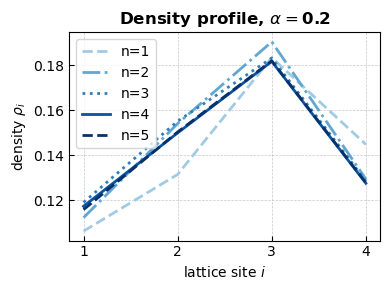

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Choose a colormap (you can change it to your preferred one)
color_map = cm.get_cmap('Blues')

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the data

# Define a list of linestyles
linestyles = ['-', '--', '-.', ':']

n = 0
for p in profile:

    line_color = color_map(0.2 + n / (n_max+1))
    
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    sites = [x + 1 for x in range(len(profile[0]))]

    if n != 0:
        ax.plot(sites,profile[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=linestyle)
    n += 1

# Set the x and y axis labels
ax.set_xlabel(r'lattice site $i$', fontsize=10)
ax.set_ylabel(r'density $\rho_i$', fontsize=10)

# Set the title
ax.set_title(r'Density profile, $\alpha = $' +
             str(alpha), fontsize=12, fontweight='bold')

# Customize the tick parameters
ax.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# Add a legend
ax.legend(fontsize=10)

# Add gridlines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust the plot layout
plt.tight_layout()

# Save the plot as a high-resolution image
# plt.savefig('figure_density.pdf', dpi=300)

# Show the plot
plt.show()

# 4. Plot the mean density and current vs $\alpha$

First we define a list of values of $\alpha$.

In [ ]:
# define a list with values of alpha to be computed
alpha_list = np.linspace(0., 0.5, 100)

We then iterate over that list and compute mean density and current for each $\alpha$. To compute the mean density we use function `mean_density` and to compute particle current we use function `current`.

In [ ]:
# define empty lists where values of rho and J will be saved
# (for the corresponding alpha and for any order):
# rho_alpha[n] will contain rho(alpha) for the order n,...
rho_alpha = []
J_alpha = []

is_first = True

for alpha in alpha_list:

    profile = local_density(rhocoeff, alpha)

    for n in range(K+1):
    
        if is_first:
            rho_alpha.append([])
            J_alpha.append([])
            if n == K:
                is_first = False

        rho = mean_density(profile[n])
        rho_alpha[n].append(rho)

    J = current(Jcoeff, alpha)
    
    n=0
    for j in J:
        J_alpha[n].append(j)
        n += 1

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Choose a colormap (you can change it to your preferred one)
color_map = cm.get_cmap('Blues')

# Create a new figure and axes for subfigure 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the data

# Define a list of linestyles
linestyles = ['-', '--', '-.', ':']

#### PLOT DENSITY
#n = 0
for n in range(K+1):

    line_color = color_map(0.2 + n / (K+1))
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    #if n != 0:
    #    rho_av = []
    #    for r1, r2 in zip(rho_alpha[n], rho_alpha[n-1]):
    #        rho_av.append(0.5*(r1+r2))
    #    ax1.plot(alpha_list, rho_av, linewidth=2, label='n=' + str(n), color=line_color, linestyle=linestyle)
    ax1.plot(alpha_list, rho_alpha[n], linewidth=2, label='n=' + str(n),color=line_color, linestyle=linestyle)
    #n += 1

# Set the x and y axis labels
ax1.set_xlabel(r'$\alpha$', fontsize=12)
ax1.set_ylabel(r'density $\rho$', fontsize=12)

# Set the title
ax1.set_title(r'density $\rho(\alpha)$', fontsize=14, fontweight='bold')

# Customize the tick parameters
ax1.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
#ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())


# Add a legend
ax1.legend(fontsize=10)

# Add gridlines
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)




#### PLOT CURRENT


for n in range(K+1):

    line_color = color_map(0.2 + n / (K+1))
    # Cycle through the linestyles list
    linestyle = linestyles[n % len(linestyles)]

    #if n != 0:
    ax2.plot(alpha_list, J_alpha[n], linewidth=2, label='n=' + str(n),
                color=line_color, linestyle=linestyle)
    #n += 1

# Set the x and y axis labels
ax2.set_xlabel(r'$\alpha$', fontsize=12)
ax2.set_ylabel(r'current $J$', fontsize=12)

# Set the title
ax2.set_title(r'current $J(\alpha)$', fontsize=14, fontweight='bold')

# Customize the tick parameters
ax2.tick_params(axis='both', which='both', direction='in', labelsize=10)

# Customize the tick parameters for x-axis
# Set tick at every integer value
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
# Format tick labels as scalar values
#ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())


# Add gridlines
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust the plot layout
plt.tight_layout()

# Add a legend
ax2.legend(fontsize=10)




# Save the plot as a high-resolution image
plt.savefig('figure_density_current.pdf', dpi=300)

# Show the plot
plt.show()


In [ ]:
profile[9] + profile[10]

In [ ]:
plt.plot(profile[1], linewidth=1, label='n=1',color='red', linestyle='-', alpha=0.5)
plt.plot(profile[2], linewidth=1, label='n=2',color=line_color, linestyle='-', alpha=0.5)
plt.plot(profile[3], linewidth=1, label='n=3',color='green', linestyle='-', alpha=0.9)

plt.legend()

In [ ]:
plt.plot(wlist,color='black', linestyle='-')